In [1]:
import os
import numpy as np
import matplotlib
# Choose backend to SVG if you wanted to save the file, the origional backend in ipython is:
# matplotlib.use('module://ipykernel.pylab.backend_inline')
# default of matplotlib is:
matplotlib.use('tkagg')
# matplotlib.use('SVG')
# It can only happen once, check all plots before restarting kernel to save
import matplotlib.pyplot as plt

print(matplotlib.get_backend())
def save_svg(figpath_name):
    if matplotlib.get_backend() == 'svg':
        plt.savefig(figpath_name, format = 'SVG')
        print('Saved successfully to "%s"\n'%figpath_name)
    else:
        print("Backend do not support saving to SVG!\n")

TkAgg


In [2]:
date_exp = '20170524'
data = np.loadtxt('{}_sco1839_confluent_plates.txt'.format(date_exp),
                  delimiter='\t',
                  skiprows = 1)
# print(data)

time = int(data[-1][0])
for i in range(1,7):
    average = np.average(data[:,i][0:3])
    data[:,i] = data[:,i] - average

KO1839 = np.zeros((time,2))
WT = np.zeros((time,2))
CM1839 = np.zeros((time,2))
OP1839 = np.zeros((time,2))

# print(data[0,1:3])
# print(data[0,3:5])
# print(data[0,5:7])

plates = {'UL':'OP1839CR8','UR':'OP1839CR11','ML':'CM1839','MR':'KO1839','BL':'WT_1','BR':'WT_2'}
for i in range(time):
    WT[i,0] = np.average(data[i,5:7])
    WT[i,1] = np.std(data[i,5:7])
    CM1839[i,0] = data[i,3]
    CM1839[i,1] = 0.0
    OP1839[i,0] = np.average(data[i,1:3])
    OP1839[i,1] = np.std(data[i,1:3])
    KO1839[i,0] = data[i,4]
    KO1839[i,1] = 0.0
    
# print(type(CM1839[i,1]))
# print(type(np.zeros((time,1))))

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
end = 97
x = data[:end,0]

ax.plot(x, KO1839[:end,0], color = 'r', label = r'$\Delta$SCO1839')
ax.fill_between(data[:end,0],
                KO1839[:end,0] + KO1839[:end,1],
                KO1839[:end,0] - KO1839[:end,1],
                color = 'r',
                alpha = 0.3)
ax.plot(x, WT[:end,0], color = 'k', label = 'M145_WT')
ax.fill_between(data[:end,0],
                WT[:end,0] + WT[:end,1],
                WT[:end,0] - WT[:end,1],
                color = 'k',
                alpha = 0.3)
ax.plot(x, CM1839[:end,0], color = 'g', label = 'SCO1839_comp.')
ax.fill_between(data[:end,0],
                CM1839[:end,0] + CM1839[:end,1],
                CM1839[:end,0] - CM1839[:end,1],
                color = 'g',
                alpha = 0.3)
ax.plot(x, OP1839[:end,0], color = 'b', label = 'SCO1839_op')
ax.fill_between(data[:end,0],
                CM1839[:end,0] + CM1839[:end,1],
                CM1839[:end,0] - CM1839[:end,1],
                color = 'b',
                alpha = 0.3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlim([0,96])

plt.xticks(np.arange(0,97,6))

def draw_line(li, cl):
    for x in range(len(li)):
        plt.axvline(li[x], color = cl[x])
        plt.text(li[x]-2.8,27,'{}h'.format(li[x]), rotation=90)
draw_line([24, 48, 72], ['k', 'brown','b'])

plt.xlabel('time')
plt.ylabel('brightness')
plt.title('{}_Growth_Scan'.format(date_exp))
plt.legend(loc = 1, ncol = 1, fontsize = 6, framealpha = 0.3)
plt.show()
save_svg('{}_Growth_Scan.svg'.format(date_exp))

Before this line is the result

-------------------------------------------------------------------

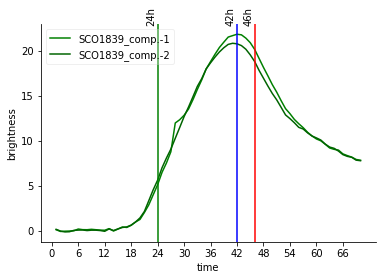

Backend do not support saving to SVG!



In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = data[:,0]

# for i in range(time):
#     KO1839[i,0] = np.average(data[i,1:7:3])
#     KO1839[i,1] = np.std(data[i,1:7:3])
#     M145[i,0] = np.average(data[i,2:7:3])
#     M145[i,1] = np.std(data[i,2:7:3])
#     CM1839[i,0] = np.average(data[i,3:7:3])
#     CM1839[i,1] = np.std(data[i,3:7:3])

# ax.plot(x, data[:,1], color = 'r', label = r'$\Delta$SCO1839-1')
# ax.plot(x, data[:,4], color = 'darkred', label = r'$\Delta$SCO1839-2')
# ax.plot(x, data[:,2], color = 'b', label = 'M145-1')
# ax.plot(x, data[:,5], color = 'darkblue', label = 'M145-2')
ax.plot(x, data[:,3], color = 'g', label = 'SCO1839_comp.-1')
ax.plot(x, data[:,6], color = 'darkgreen', label = 'SCO1839_comp.-2')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.xticks(np.arange(0,time+1,6))
plt.axvline(24, color = 'g')
plt.text(21.5,24,'24h', rotation=90)
plt.axvline(42, color = 'b')
plt.text(39.5,24,'42h', rotation=90)
plt.axvline(46, color = 'r')
plt.text(43.5,24,'46h', rotation=90)
plt.xlabel('time')
plt.ylabel('brightness')
plt.legend(loc = 2, ncol = 1, fontsize = 10, framealpha = 0.3)
plt.show()
save_svg('48h.svg')